In [2]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('default')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Load data
train_df = pd.read_csv('./playground-series-s5e8/train.csv')
test_df = pd.read_csv('./playground-series-s5e8/test.csv')

In [ ]:
# GOAL: Predict will the client subscribe to a bank term deposit
train_df.head(27)
#test_df.head(12)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
5,750005,43,management,divorced,unknown,no,3025,no,no,cellular,21,jul,89,2,-1,0,unknown
6,750006,26,services,single,primary,no,3511,no,no,cellular,29,jan,816,3,-1,0,unknown
7,750007,60,management,married,tertiary,no,79,no,yes,cellular,9,jul,707,1,-1,0,unknown
8,750008,45,blue-collar,married,primary,no,16,no,no,telephone,6,feb,173,1,-1,0,unknown
9,750009,41,management,married,tertiary,no,46,no,no,cellular,18,aug,657,4,-1,0,unknown


In [ ]:
#train_df.isnull().sum() #0
#test_df.isnull().sum() #0
#test_df.info()
#train_df.duplicated().sum() #0
#test_df.duplicated().sum() #0

np.int64(0)

In [4]:
# create copy of data frame so the original is untouched
X = train_df.copy() 
X_test = test_df.copy()
ids = X_test['id'].copy()

# removes the label column and stores it in y
y = X.pop('y')

# Converts months from strings to integers
X['month'] = \
    X['month'].map(
        {'jan':1, 'feb': 2, 'mar':3,
         'apr':4, 'may':5, 'jun':6, 'jul':7,
         'aug':8, 'sep':9, 'oct':10,
         'nov':11, 'dec':12}
    )
X_test['month'] = \
    X_test['month'].map(
        {'jan':1, 'feb': 2, 'mar':3,
         'apr':4, 'may':5, 'jun':6, 'jul':7,
         'aug':8, 'sep':9, 'oct':10,
         'nov':11, 'dec':12}
    )


# sets negative values to 0 in pdays (lots of -1 were in this col)
X.loc[X['pdays'] < 0, 'pdays'] = 0
X_test.loc[X['pdays'] < 0, 'pdays'] = 0

X.head(50)




,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,8,117,3,0,0,unknown
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,6,185,1,0,0,unknown
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,5,111,2,0,0,unknown
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,5,10,2,0,0,unknown
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,2,902,1,0,0,unknown
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,4,1010,3,0,0,unknown
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,11,90,1,0,0,unknown
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,7,49,25,0,0,unknown
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,8,50,1,0,0,unknown
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,5,119,1,0,0,unknown


In [6]:
features_num = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
features_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# fills missing numerical values with a constant(default=0) and standardizes
transformer_num = make_pipeline(SimpleImputer(strategy='constant'),
                                StandardScaler(),
                                )


# replaces missing categories with 'NA' and creates indicator cols and safely ignores cats appearing in validation that weren't seen in training
transformer_cat = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='NA'), 
    OneHotEncoder(handle_unknown='ignore')
)

# applies each pipeline to the respective features
# any columns not listed are dropped (default='drop')
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat)
)

# stratify - make sure classes are evenly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)


X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.fit_transform(X_test)

input_shape = [X_train.shape[1]]

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - binary_accuracy: 0.8929 - loss: 0.2708 - val_binary_accuracy: 0.9176 - val_loss: 0.1867
Epoch 2/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - binary_accuracy: 0.9148 - loss: 0.1918 - val_binary_accuracy: 0.9226 - val_loss: 0.1751
Epoch 3/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.9194 - loss: 0.1809 - val_binary_accuracy: 0.9240 - val_loss: 0.1710
Epoch 4/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.9218 - loss: 0.1766 - val_binary_accuracy: 0.9249 - val_loss: 0.1687
Epoch 5/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.9232 - loss: 0.1735 - val_binary_accuracy: 0.9261 - val_loss: 0.1668
Epoch 6/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.9241 - loss: 0.1715 - val_binary_accuracy: 0.9268 - val_loss: 0.1652
Epoch 7/100
550/550 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.9245 - loss: 0.1699 - val_binary_accuracy: 0.9276 - val_loss: 0.164

<Axes: title={'center': 'Accuracy'}>

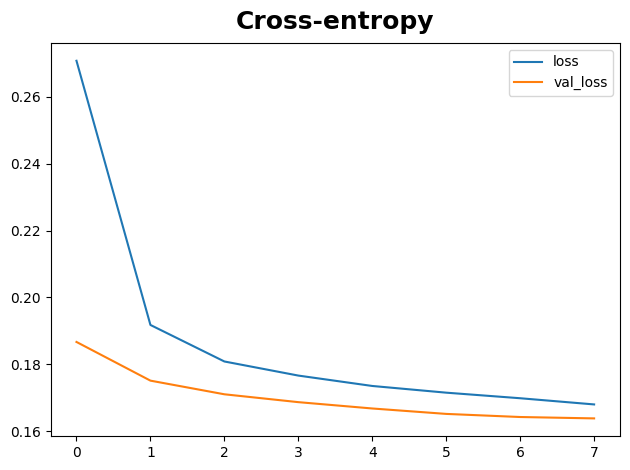

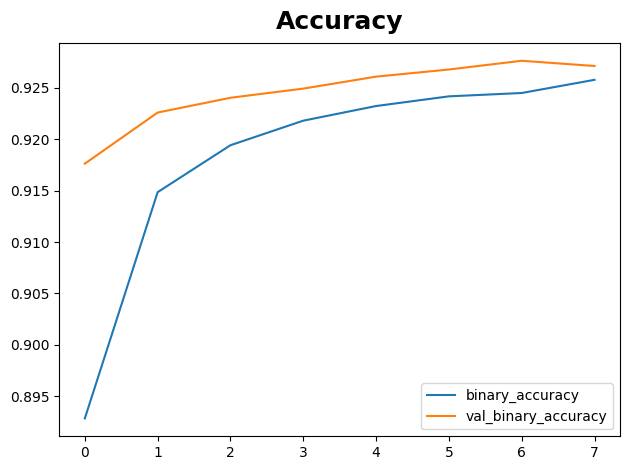

In [13]:
#these settings got me this accuracy: 0.9301 -> 0.9305 -> 0.9314 with batch size = 1024

early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.003,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1024,
    epochs=100,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
THRESHOLD = 0.5

y_prob = model.predict(X_test, verbose=0).ravel()
y_out = (y_prob >= THRESHOLD).astype(int) 

out = pd.DataFrame({'id': ids, 'y': y_out})
out.to_csv('output4.csv', index=False)
out.head(5)

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
